# Streamline your code

We will:

- Extract data from CSV to create a `geopandas.GeoDataFrame`
- Do more customizations for maps and `matplotlib` figures
- Go over strategies to streamline your code!

## Data Loading

In [1]:
import os

import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype

import geopandas as gpd
import matplotlib.pyplot as plt

# Display all columns when looking at dataframes
pd.set_option('display.max.columns', None)

In [2]:
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)

# Drop first columns
power_plants = power_plants.drop(columns = 'Unnamed: 0')
power_plants.head()

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900
3,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889
4,11574,9,Copper,5701,El Paso Electric Co,Electric Utility,651 Hawkins Blvd.,El Paso,El Paso,Texas,79915.0,natural gas,Natural Gas = 63 MW,Natural Gas Fired Combustion Turbine,86.9,63.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-106.375000,31.756900


In [3]:
# Import states data
fp = os.path.join('data','tl_2022_us_state','tl_2022_us_state.shp')
states = gpd.read_file(fp)

# Simplify column names
states.columns = states.columns.str.lower()

states.head()

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


## CSV to `geopandas.GeoDataFrame`

The power plants file is a CSV. Unlike shapefiles, `geopandas` doesn't have a way to extract a geometry column from CSV. So we need to specify this manually.

We will use the longitude and latitude columns in the CSV, these indicate the longitude of the power plants in NAD83 CRS (EPSG: 4259).

In [4]:
# Create point from latitude and longtitude
points = gpd.points_from_xy(power_plants.longitude,
                            power_plants.latitude)

In [5]:
# Create geodatframe
power_plants = gpd.GeoDataFrame(power_plants, # Data
                 geometry = points, # Specify geometry columns
                 crs = 4269) # Specify CRS

<Axes: >

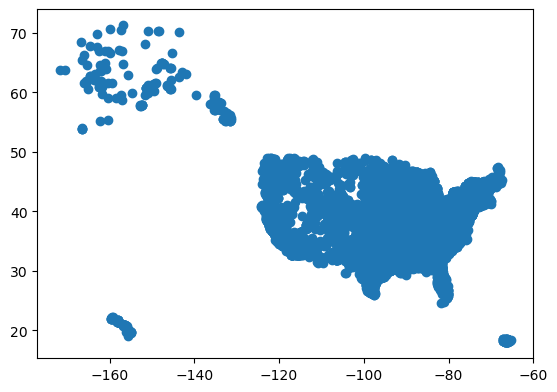

In [6]:
power_plants.plot()

## f-strings

We have printed variables using string concatenation inside `print()` function writing commas between every string and variable we want to print. 

Example:

In [7]:
print('CRS:', power_plants.crs)

CRS: EPSG:4269


f-strings = formatted string. The simplest syntax for and f-string is:

``` default
f`` some text {replace}"
```

`replace` can be a variable, an expression, a function or method call.

In [8]:
# Explore CRS
print(f"ellipsoid: {power_plants.crs.ellipsoid}")
print(f"datum: {power_plants.crs.datum}")

ellipsoid: GRS 1980
datum: North American Datum 1983


In [9]:
print(f"{'Is the CRS geographic?': <25} {power_plants.crs.is_geographic}")
print(f"{'Is the CRS projected?': <25} {power_plants.crs.is_projected}")

Is the CRS geographic?    True
Is the CRS projected?     False


## Explore TIGER shapefile
Preliminary information about the state shapefiles

In [10]:
states.tail()

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
51,1,1,25,00606926,25,MA,Massachusetts,00,G4000,A,20204341720,7130708927,+42.1565196,-071.4895915,"POLYGON ((-71.25515 42.73655, -71.25510 42.736..."
52,3,5,51,01779803,51,VA,Virginia,00,G4000,A,102258178227,8528072639,+37.5222512,-078.6681938,"POLYGON ((-76.49150 36.55065, -76.49388 36.550..."
53,3,5,11,01702382,11,DC,District of Columbia,00,G4000,A,158316184,18709787,+38.9042474,-077.0165167,"POLYGON ((-77.11975 38.93435, -77.11886 38.935..."
54,2,4,19,01779785,19,IA,Iowa,00,G4000,A,144659596400,1086089872,+42.0700243,-093.4933473,"POLYGON ((-95.86095 43.50004, -95.85979 43.500..."
55,4,8,04,01779777,04,AZ,Arizona,00,G4000,A,294365853885,853990728,+34.2039362,-111.6063449,"POLYGON ((-110.75069 37.00301, -110.74193 37.0..."


EPSG:4269
EPSG:4269


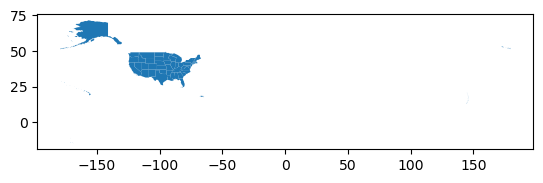

In [11]:
print(states.crs)
states.plot()
print(power_plants.crs)

## `for` loops

It can be easier to work with codes as numbers instead of strings, let's update the corresponding coluymns in the states geo-dataframe.

In [12]:
# Examine if the region, division, statefp columns are string or numeric
print(f"region is string dtype? {is_string_dtype(states['region'])} ")
print(f"division is string dtype? {is_string_dtype(states['division'])} ")
print(f"statefp is string dtype? {is_string_dtype(states['statefp'])} ")

region is string dtype? True 
division is string dtype? True 
statefp is string dtype? True 


In [13]:
states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   region    56 non-null     object  
 1   division  56 non-null     object  
 2   statefp   56 non-null     object  
 3   statens   56 non-null     object  
 4   geoid     56 non-null     object  
 5   stusps    56 non-null     object  
 6   name      56 non-null     object  
 7   lsad      56 non-null     object  
 8   mtfcc     56 non-null     object  
 9   funcstat  56 non-null     object  
 10  aland     56 non-null     int64   
 11  awater    56 non-null     int64   
 12  intptlat  56 non-null     object  
 13  intptlon  56 non-null     object  
 14  geometry  56 non-null     geometry
dtypes: geometry(1), int64(2), object(12)
memory usage: 6.7+ KB


This inconvenient because it repeats the same piece of code, only changing the column name.

Instead, we can use a for loop to streamline:

In [14]:
code_cols = ['region', 'division', 'statefp']

# Check whether codes column are strings
for column in code_cols:
    print(f"{column} is string dtype? {is_string_dtype(states[column])} ")


region is string dtype? True 
division is string dtype? True 
statefp is string dtype? True 


**Dry Code**

DRY = Don't repeat yourself = core programming principle that encourages reducing redundancy and consolidating repeated logic. If you need to repeat the "same" code more than twice, you probably need a for loop. 

## `assert`

The `assert` keyword does nothing if the expression next to it evaluates to `True` and it raises an `AssertionError` exception and stops your code from running further if not. 

We use it to integrate tests into our codes.

Example

 

In [15]:
# Does nothing if statement is True
assert 2 + 2 == 4

# Raise an error if statement is False
assert  2 + 2 == 3

AssertionError: 

A workflow for updating the data type of code columns to be integers:

For each column in code_columns:
    convert column to numeric
    check if column is numeric using assert

In [16]:
# Update code columns into integers
for column in code_cols:
    states[column] = states[column].astype('int')
    assert is_numeric_dtype(states[column])

In [17]:
states.dtypes

region         int64
division       int64
statefp        int64
statens       object
geoid         object
stusps        object
name          object
lsad          object
mtfcc         object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

## Data selection

For this lesson, we want to use only data fo the contiguous states. The data covers a bigger extension:

<Axes: >

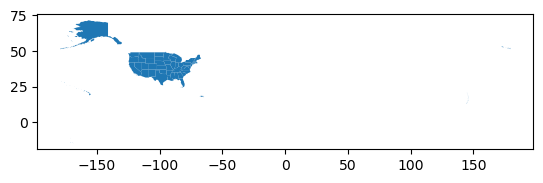

In [18]:
states.plot()

## Check-in

1. What the the unique values for region, division, or state codes in the data?
    - Region (1, 2, 3, 4, 9)
    - State FIPS code ()
    - Division ('5', '3', '4', '1', '8', '9', '2', '7', '6', '0')
2. Which codes should we select to only keep states in the contiguous US?

In [19]:
states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   region    56 non-null     int64   
 1   division  56 non-null     int64   
 2   statefp   56 non-null     int64   
 3   statens   56 non-null     object  
 4   geoid     56 non-null     object  
 5   stusps    56 non-null     object  
 6   name      56 non-null     object  
 7   lsad      56 non-null     object  
 8   mtfcc     56 non-null     object  
 9   funcstat  56 non-null     object  
 10  aland     56 non-null     int64   
 11  awater    56 non-null     int64   
 12  intptlat  56 non-null     object  
 13  intptlon  56 non-null     object  
 14  geometry  56 non-null     geometry
dtypes: geometry(1), int64(5), object(9)
memory usage: 6.7+ KB


In [20]:
print(states.region.unique())
print(states.statefp.unique())
print(states.division.unique())

[3 2 1 4 9]
[54 12 17 27 24 44 16 33 37 50  9 10 35  6 34 55 41 31 42 53 22 13  1 49
 39 48  8 45 40 47 56 15 38 21 78 69 66 23 36 32  2 60 26  5 28 29 30 20
 18 72 46 25 51 11 19  4]
[5 3 4 1 8 9 2 7 6 0]


Remove region 9 or division 0.
Hawaii and Alaska have codes 2 and 15.

<Axes: >

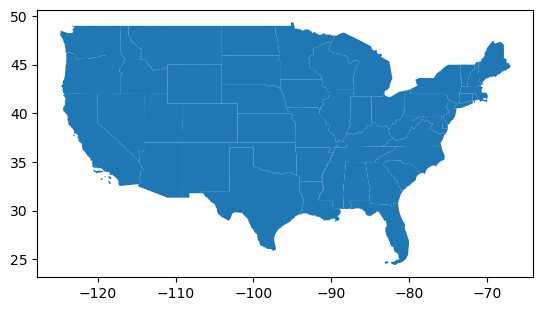

In [21]:
# Select contiguous US states
contiguous = states[(states.region != 9) & (~states.statefp.isin([2, 15]))]
contiguous.plot()

The `~` tilde symbol to used in Python to negate a statement.

## Check-in

Select the data in the `power_plants` data frame for the contiguous US states

In [22]:
power_plants.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12009 entries, 0 to 12008
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   objectid        12009 non-null  object  
 1   plant_code      12009 non-null  object  
 2   plant_name      12009 non-null  object  
 3   utility_id      12009 non-null  object  
 4   utility_name    12005 non-null  object  
 5   sector_name     12008 non-null  object  
 6   street_address  11920 non-null  object  
 7   city            11986 non-null  object  
 8   county          11965 non-null  object  
 9   state           12008 non-null  object  
 10  zip             11990 non-null  float64 
 11  primsource      12007 non-null  object  
 12  source_desc     12007 non-null  object  
 13  tech_desc       12007 non-null  object  
 14  install_mw      12007 non-null  float64 
 15  total_mw        12007 non-null  float64 
 16  bat_mw          461 non-null    float64 
 17  bio_

<Axes: >

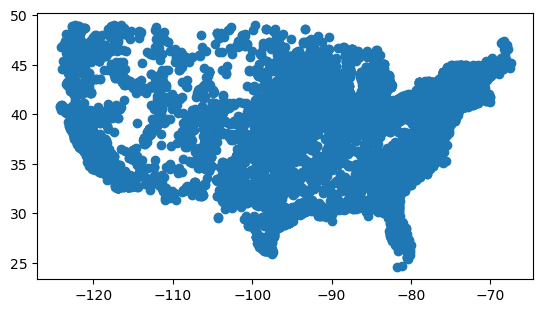

In [23]:
power_plants = power_plants[~power_plants.state.isin(['Puerto Rico', 'Hawaii', 'Alaska'])]
power_plants.plot()

## Plotting

Before plotting data we need to make sure they are in the same CRS.

In [24]:
contiguous.crs == power_plants.crs

True

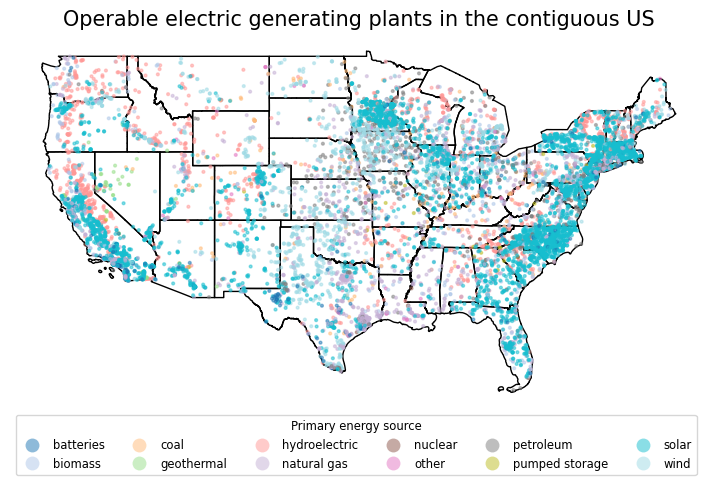

In [29]:
fig, ax = plt.subplots(figsize = (9, 5)) # Update figure size

# Remove the axis for a cleaner map
ax.axis('off')

# Title
ax.set_title('Operable electric generating plants in the contiguous US',
             fontsize = 15)

# Add states
contiguous.plot(ax = ax,
                color = 'none')

# Add power plants colored by energy source
power_plants.plot(ax = ax,
                  column = 'primsource',
                  legend = True,
                  markersize = 4,
                  cmap = 'tab20',
                  alpha = 0.5,
                  legend_kwds = {
                      'title': 'Primary energy source',
                      'title_fontsize': 'small',
                      'fontsize': 'small',
                      'loc': 'upper left',
                      'bbox_to_anchor': (0, 0),
                      'ncol': 6}
                  )

plt.show()

## `for` with `zip`

Often we need to iterate simutaneously over two lists (or iterables).

`zip()` is a Python function that allows you to combine two lists so that you can iterate over their elements in pairs. When used in a `for` loop it allows you to process elements from each list together.

Example:

In [30]:
# Iterate over a single list
numbers = [1, 2, 3]
for num in numbers:
    print(num + 1)

2
3
4


In [31]:
# Iterate over two lists in pairs using zip()
letters = ['a', 'b', 'c']
for num, letter in zip(numbers, letters):
    print(num + 1, letter)

2 a
3 b
4 c


A common situation when code gets repeated is when creating subplots

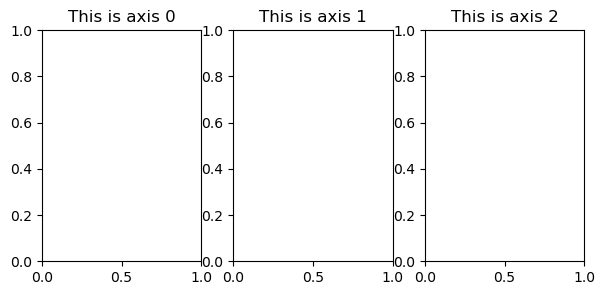

In [32]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (7, 3))

axes[0].set_title('This is axis 0')
axes[1].set_title('This is axis 1')
axes[2].set_title('This is axis 2')

plt.show()

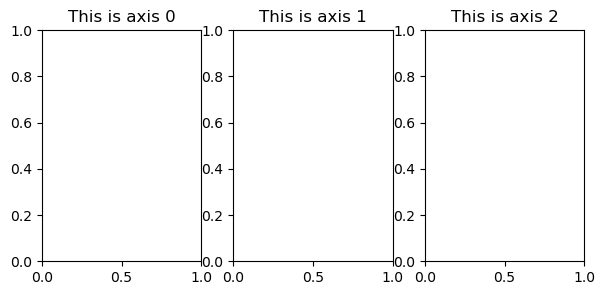

In [33]:
# Use zip to create same subplots and avoid redundancy

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (7, 3))

for ax, i in zip(axes, [0, 1, 2]):
    ax.set_title(f'This is axis {i}')

plt.show()

In [84]:
ca_power_plants['primsource'].value_counts()

primsource
solar             766
natural gas       328
hydroelectric     244
wind              107
biomass           101
batteries          65
geothermal         33
petroleum          13
other              11
pumped storage      7
nuclear             1
coal                1
Name: count, dtype: int64

In [75]:
ca_power_plants = power_plants[power_plants['state'] == 'California'].copy()
top_sources = (ca_power_plants['primsource'].value_counts().index[ :3].tolist())


In [76]:
ca_boundary = states[states['name'] == 'California'].copy()

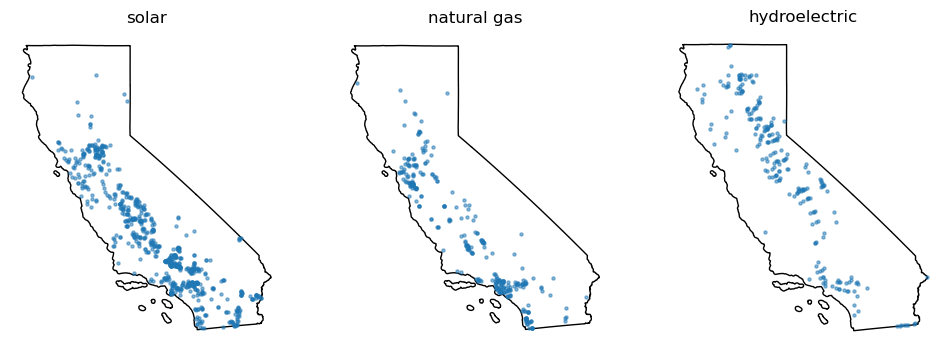

In [85]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 6))

for ax, i in zip(axes, top_sources):
    ax.set_title(f'{i}')
    ax.axis('off')
    
    ca_boundary.plot(ax = ax,
                     color = 'none',
                     edgecolor = 'black')
    
    ca_power_plants[ca_power_plants['primsource'] == i].plot(ax = ax,
                                                             markersize = 5,
                                                             alpha = 0.5)

plt.show()